# Activation Functions in Neural Networks
An activation function determines the output of a deep learning model, its accuracy, and the computational efficiency of training a model. It introduces **non-linearity** to the network.

In this notebook, we will look at 6 common activation functions:
1. **Sigmoid**
2. **Tanh**
3. **ReLU**
4. **Leaky ReLU**
5. **SELU**
6. **Softmax**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A helper function to plot 
def plot_activation(x, y, y_derivative, title):
    plt.figure(figsize=(10, 5))
    
    # Plot the Function
    plt.plot(x, y, label=f'{title} Function', linewidth=3, color='blue')
    
    # Plot the Derivative
    plt.plot(x, y_derivative, label='Derivative', linewidth=2, linestyle='--', color='red')
    
    plt.title(title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)
    plt.show()

# Generate data range
x = np.linspace(-5, 5, 200)

## 1. Sigmoid Function
The Sigmoid function squashes values between **0 and 1**. It is historically used for binary classification, though it suffers from the "vanishing gradient" problem in deep networks.

**Formula:**
$$f(x) = \frac{1}{1 + e^{-x}}$$

**Derivative:**
$$f'(x) = f(x) \cdot (1 - f(x))$$

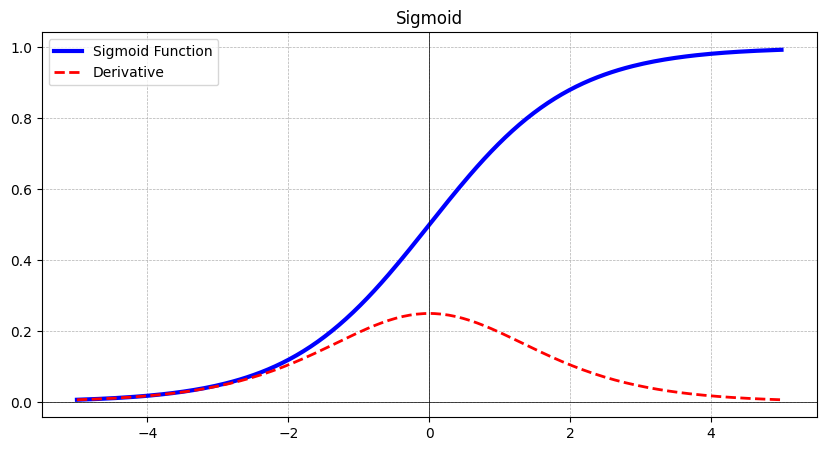

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    f = sigmoid(x)
    return f * (1 - f)

plot_activation(x, sigmoid(x), sigmoid_derivative(x), "Sigmoid")

## 2. Tanh (Hyperbolic Tangent)
Tanh is similar to Sigmoid but zero-centered. It squashes values between **-1 and 1**. It is generally preferred over Sigmoid for hidden layers because the gradients are stronger.

**Formula:**
$$f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

**Derivative:**
$$f'(x) = 1 - f(x)^2$$

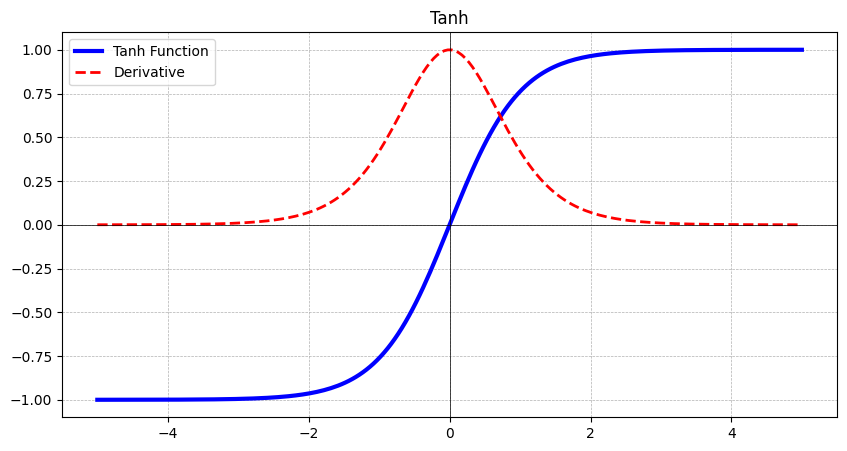

In [3]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

plot_activation(x, tanh(x), tanh_derivative(x), "Tanh")

## 3. ReLU (Rectified Linear Unit)
ReLU is the most popular activation function for hidden layers. It is computationally efficient and solves the vanishing gradient problem for positive inputs.

**Formula:**
$$f(x) = \max(0, x)$$

**Derivative:**
$$
f'(x) = \begin{cases} 
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0 
\end{cases}
$$

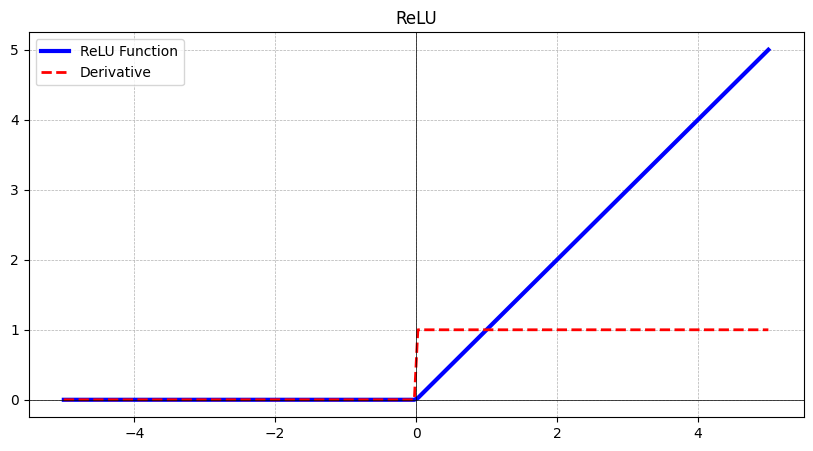

In [4]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

plot_activation(x, relu(x), relu_derivative(x), "ReLU")

## 4. Leaky ReLU
Leaky ReLU is a variation of ReLU designed to fix the "dying ReLU" problem. It allows a small gradient when the unit is not active.

**Formula:**
$$f(x) = \max(\alpha x, x)$$ 
*(where $\alpha$ is a small constant, e.g., 0.1)*

**Derivative:**
$$
f'(x) = \begin{cases} 
1 & \text{if } x > 0 \\
\alpha & \text{if } x \leq 0 
\end{cases}
$$

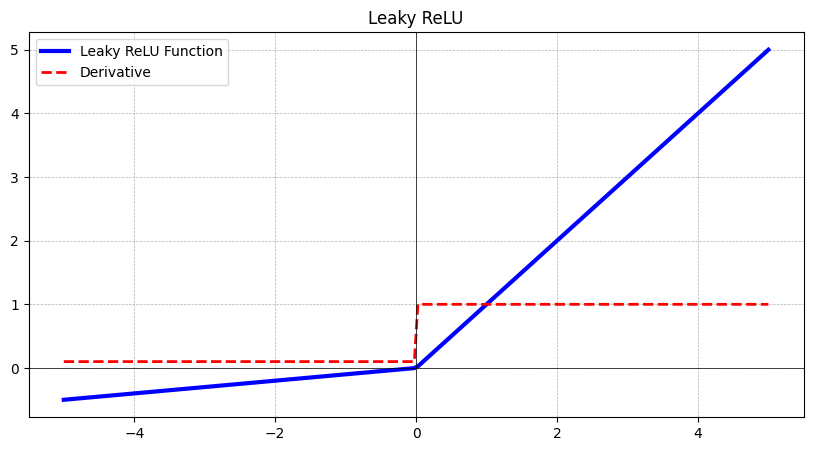

In [5]:
def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, x * alpha)

def leaky_relu_derivative(x, alpha=0.1):
    return np.where(x > 0, 1, alpha)

plot_activation(x, leaky_relu(x), leaky_relu_derivative(x), "Leaky ReLU")

## 5. SELU (Scaled Exponential Linear Unit)
SELU allows deep neural networks to "self-normalize," meaning the output of each layer preserves a mean of 0 and variance of 1. This solves vanishing/exploding gradient problems in very deep networks. It relies on specific values for $\alpha$ and $\lambda$.

**Formula:**
$$
f(x) = \lambda \begin{cases} 
x & \text{if } x > 0 \\
\alpha (e^x - 1) & \text{if } x \leq 0 
\end{cases}
$$
*Constants: $\lambda \approx 1.0507$, $\alpha \approx 1.6733$*

**Derivative:**
$$
f'(x) = \lambda \begin{cases} 
1 & \text{if } x > 0 \\
\alpha e^x & \text{if } x \leq 0 
\end{cases}
$$

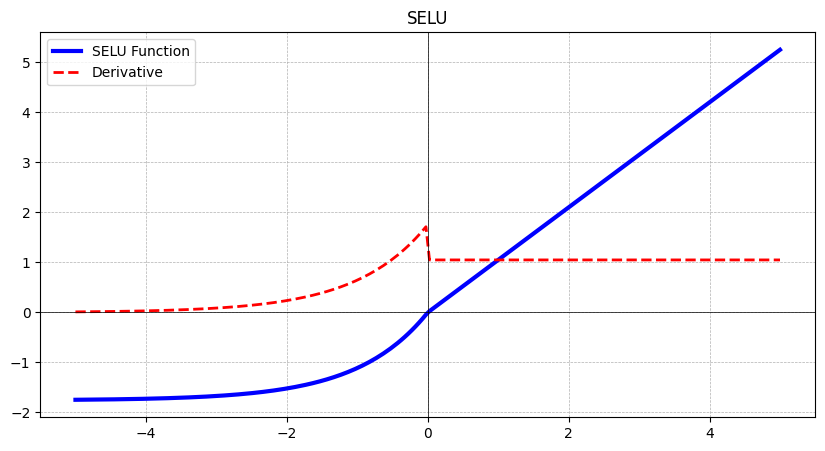

In [6]:
# Constants defined in the SELU paper
ALPHA = 1.67326324
LAMBDA = 1.05070098

def selu(x):
    return LAMBDA * np.where(x > 0, x, ALPHA * (np.exp(x) - 1))

def selu_derivative(x):
    return LAMBDA * np.where(x > 0, 1, ALPHA * np.exp(x))

plot_activation(x, selu(x), selu_derivative(x), "SELU")

### 6. Softmax Function

The Softmax function is typically used in the output layer of multi-class classification problems. It converts a vector of raw scores (logits) into probabilities that sum to 1.

**Formula:**
For an input vector $z$ of length $K$:
$$ \sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} $$

**Derivative:**
The derivative forms a Jacobian matrix:
$$
\frac{\partial \sigma_i}{\partial z_j} = \sigma_i (\delta_{ij} - \sigma_j)
$$
*Where $\delta_{ij}$ is 1 if $i=j$, and 0 otherwise.*


In [7]:
def softmax(x):
    e_x = np.exp(x - np.max(x)) # Subtract max for numerical stability
    return e_x / e_x.sum(axis=0)


# Visualization for Softmax (Bar Chart)
test = np.array([2.0, 1.0, 0.1])
probs = softmax(test)

print(f"Softmax input: {test}")
print(f"Softmax output: {probs}")
print(f"Sum of softmax output: {np.sum(probs)}")


Softmax input: [2.  1.  0.1]
Softmax output: [0.65900114 0.24243297 0.09856589]
Sum of softmax output: 1.0
